In [1]:
# pip install pyldavis

In [55]:
# for data exploration
import pandas as pd
import numpy as np
import datetime as dt 

# remove warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# for text processing 
import re
import nltk 
import requests

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string 
string.punctuation

from bs4 import BeautifulSoup
# from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

# gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
%matplotlib inline

# for word cloud
from wordcloud import WordCloud

print('✔️ Libraries Imported!')

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

✔️ Libraries Imported!


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)
pd.set_option('display.max_colwidth', None)

print('✔️ Magic Env Ready to Roll!')

✔️ Magic Env Ready to Roll!


In [4]:
url = "https://www.gartner.com/en/information-technology/insights/trending-topics"

In [5]:
response = requests.get(url)

In [6]:
soup = BeautifulSoup(response.text,'html.parser')
parsed_html = str(soup)
truncated_html = parsed_html[:500]  # Display the first 500 characters
print(truncated_html)

<!DOCTYPE HTML>

<html lang="en">
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<title>Trending Topics for IT (Information Technology) Leaders | Gartner</title>
<meta content="Information Technology,Insights Hub" name="keywords"/>
<meta content="Data analytics, AI, IoT, cybersecurity, cloud computing, and blockchain technology will be among the top trending tech


In [7]:
# display entire parsed data
# print(soup.prettify())

In [8]:
# Find all the elements with class "headline" (which contains the titles)
title_elements = soup.find_all('div', class_='headline')
# title_elements
# Find all the elements with class "description" (which contains the descriptions)
description_elements = soup.find_all('div', class_='description')
# description_elements

In [9]:
title = title_elements[0].find('h4',class_='h4').text.lstrip()
title
description = description_elements[0].find('p', class_='p-short').text.strip()
description

'What Generative AI Means for Business'

'An executive’s guide to understanding, implementing and planning for the future of GenAI'

In [10]:
data = []
for title_elem,desc_elem in zip(title_elements,description_elements):
    title = title_elem.find('h4',class_='h4').text.lstrip()
    description = desc_elem.find('p', class_='p-short').text.strip()
    # print(f"Title: {title}")
    # print(f"Description: {description}")
    # print()  # Add a separator between each title-description pair
    data.append({'Title': title, 'Description': description})
trend_data = pd.DataFrame(data)
# trend_data

In [11]:
# trend_data.to_csv('trending_topics.csv',index=False)

In [12]:
df = trend_data.copy()
df.columns = [col.lower() for col in df.columns]
df['description_length'] = df['description'].str.len()
df

,title,description,description_length
0,What Generative AI Means for Business,"An executive’s guide to understanding, implementing and planning for the future of GenAI",88
1,Build a Better IT Strategic Plan,Explore here a one-page IT strategy plan template to build a successful IT strategic plan & communicate your strategy effectively. Unlock your IT Strategic plan template now.,174
2,Use Gartner Cybersecurity Research & Insights to Develop Your Ideal Security Strategy,"Use Gartner Cybersecurity Research, tools and insights to build a resilient security strategy and save time on planning and scoping against cybersecurity threats.",162
3,What Is Artificial Intelligence (AI),Everything you need to know about artificial intelligence (AI) terms and techniques.,84
4,Explore The Latest Cloud Computing Technology and Security,Cloud computing forms the foundation for many digital business initiatives. A solid cloud strategy will help maximize the value of your cloud investments.,154
5,Gartner 2023 Top 10 Strategic Technology Trends,Download the eBook on Gartner Top Strategic Technology Trends and see when and how these 10 trends will drive strategic impact in 2023 and beyond.,146
6,Use Artificial Intelligence to Grow Your Business Revenue,"Gartner's Artificial Intelligence insights help leadership to drive revenue growth and achieve business goals by improving quality, speed, and functionality.",157
7,Reinvest in Growth with Smarter IT Spending,"To maximize cost savings, IT leaders should pursue cost optimization through both function-specific and enterprise-wide programs. Cost optimization is a business-focused, continuous discipline intended to maximize business value while reducing costs.",250
8,Technology Priorities CIOs Must Address in 2023,The 2023 Gartner CIO Agenda Report outlines the 4 key actions that CIOs can take to accelerate impact. Learn more here.,119
9,How Data Analytics Help in Making Business Decisions,Data and analytics leaders must create a data-driven culture focused on using enterprise analytics to drive digital transformation and redefine the CX.,151


In [13]:
# plot distribution of length of characters in data
# sns.distplot(df['description_length'],color='red')

---
Data Preprocessing
---
---


1. Lower Casing
- The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

2. Removal of Punctuation
- The string.punctuation in Python contains the following punctuations:
- !"#$%&'()*+,-./:;<=>?@[\]^_{|}~`

3. Removal of Stopwords
- The commonly occuring words in a language that doesn't provides valuable information.

4. Stemming
- Convert words to it's word stem, base or root. Porter Stemmer is for English language. If we are working with other languages, we can use snowball stemmer.

5. Lemmatization
- Convert the word to it's original form based on its context, slower but more linguistic revalent.




In [14]:
# nltk initialization
# Data Preprocessing
# nltk.download('stopwords')
# nltk.download('wordnet')
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()  # Initialize the lemmatizer
stemmer = PorterStemmer()  # Initialize the stemmer

The experiment above shows that words are more revelant to their original meaning when lemmatizing is applied. Therefoer we would use the clean_text_lemma function for the whole text transformation.

- stemming

In [15]:
def clean_text_stemming(var):
    # tokenize sentence
    my_text = [ nltk.word_tokenize(word) for word in var]
    # remove not english characters, lower case and remove the white apace at end 
    my_text = re.sub('[^A-Za-z0-9]+', " ",var).lower().strip()
    # remove stopwords
    my_text = [word for word in my_text.split() if word not in stopwords]
    return my_text


In [16]:
a = df['description'].apply(lambda x: clean_text_stemming(x))
a

0                                                                                                                                                                [executive, guide, understanding, implementing, planning, future, genai]
1                                                                               [explore, one, page, strategy, plan, template, build, successful, strategic, plan, communicate, strategy, effectively, unlock, strategic, plan, template]
2                                                                                   [use, gartner, cybersecurity, research, tools, insights, build, resilient, security, strategy, save, time, planning, scoping, cybersecurity, threats]
3                                                                                                                                                               [everything, need, know, artificial, intelligence, ai, terms, techniques]
4                                                               

Lemmetization

In [17]:
def clean_text_lemma(var):
    
    wordnet_map = {"N": wordnet.NOUN,"V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    # tokenize sentence
    my_text = [ nltk.word_tokenize(word) for word in var]
    # remove not english characters, lower case and remove the white apace at end 
    my_text = re.sub('[^A-Za-z0-9]+', " ",var).lower().strip()
    # remove stopwords
    my_text = [word for word in my_text.split() if word not in stopwords]
    # lemmatizing
    pos_tagged_text = nltk.pos_tag(my_text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, wordnet_map.get(pos[0], wordnet.NOUN)) for token, pos in pos_tagged_text]
    # Join the lemmatized tokens back into a text string
    # lemmatized_tokens  = ' '.join(lemmatized_tokens)
    
    return lemmatized_tokens 

In [18]:
b = df['description'].apply(lambda x: clean_text_lemma(x))
b

0                                                                                                                                                              [executive, guide, understand, implement, planning, future, genai]
1                                                                       [explore, one, page, strategy, plan, template, build, successful, strategic, plan, communicate, strategy, effectively, unlock, strategic, plan, template]
2                                                                                  [use, gartner, cybersecurity, research, tool, insight, build, resilient, security, strategy, save, time, plan, scoping, cybersecurity, threat]
3                                                                                                                                                         [everything, need, know, artificial, intelligence, ai, term, technique]
4                                                                                       [cloud, 

Observation:
- since both stemming & lemma results are same we will go with lema because it is base or dictionary form (lemma), word wherease stemming is obtained by removing prefixes or suffixes from words to obtain a root or stem.

In [19]:
df['lemma_words'] = df['description'].apply(lambda x: clean_text_lemma(x))
df

,title,description,description_length,lemma_words
0,What Generative AI Means for Business,"An executive’s guide to understanding, implementing and planning for the future of GenAI",88,"[executive, guide, understand, implement, planning, future, genai]"
1,Build a Better IT Strategic Plan,Explore here a one-page IT strategy plan template to build a successful IT strategic plan & communicate your strategy effectively. Unlock your IT Strategic plan template now.,174,"[explore, one, page, strategy, plan, template, build, successful, strategic, plan, communicate, strategy, effectively, unlock, strategic, plan, template]"
2,Use Gartner Cybersecurity Research & Insights to Develop Your Ideal Security Strategy,"Use Gartner Cybersecurity Research, tools and insights to build a resilient security strategy and save time on planning and scoping against cybersecurity threats.",162,"[use, gartner, cybersecurity, research, tool, insight, build, resilient, security, strategy, save, time, plan, scoping, cybersecurity, threat]"
3,What Is Artificial Intelligence (AI),Everything you need to know about artificial intelligence (AI) terms and techniques.,84,"[everything, need, know, artificial, intelligence, ai, term, technique]"
4,Explore The Latest Cloud Computing Technology and Security,Cloud computing forms the foundation for many digital business initiatives. A solid cloud strategy will help maximize the value of your cloud investments.,154,"[cloud, compute, form, foundation, many, digital, business, initiative, solid, cloud, strategy, help, maximize, value, cloud, investment]"
5,Gartner 2023 Top 10 Strategic Technology Trends,Download the eBook on Gartner Top Strategic Technology Trends and see when and how these 10 trends will drive strategic impact in 2023 and beyond.,146,"[download, ebook, gartner, top, strategic, technology, trend, see, 10, trend, drive, strategic, impact, 2023, beyond]"
6,Use Artificial Intelligence to Grow Your Business Revenue,"Gartner's Artificial Intelligence insights help leadership to drive revenue growth and achieve business goals by improving quality, speed, and functionality.",157,"[gartner, artificial, intelligence, insight, help, leadership, drive, revenue, growth, achieve, business, goal, improve, quality, speed, functionality]"
7,Reinvest in Growth with Smarter IT Spending,"To maximize cost savings, IT leaders should pursue cost optimization through both function-specific and enterprise-wide programs. Cost optimization is a business-focused, continuous discipline intended to maximize business value while reducing costs.",250,"[maximize, cost, saving, leader, pursue, cost, optimization, function, specific, enterprise, wide, program, cost, optimization, business, focus, continuous, discipline, intend, maximize, business, value, reducing, cost]"
8,Technology Priorities CIOs Must Address in 2023,The 2023 Gartner CIO Agenda Report outlines the 4 key actions that CIOs can take to accelerate impact. Learn more here.,119,"[2023, gartner, cio, agenda, report, outline, 4, key, action, cio, take, accelerate, impact, learn]"
9,How Data Analytics Help in Making Business Decisions,Data and analytics leaders must create a data-driven culture focused on using enterprise analytics to drive digital transformation and redefine the CX.,151,"[data, analytics, leader, must, create, data, driven, culture, focus, use, enterprise, analytics, drive, digital, transformation, redefine, cx]"


count vectorization

In [20]:

def countVectorizer(var):
    # Initialize the CountVectorizer
    count_vectorizer = CountVectorizer()
    
    # Fit and transform the words using CountVectorizer
    word_counts = count_vectorizer.fit_transform(var)
    
    # # Get the vocabulary (unique words)
    vocabulary = count_vectorizer.get_feature_names_out()
    
    # # Sum the word counts for each word in the list
    word_counts = word_counts.sum(axis=0)
    
    # # Create a dictionary to store the word counts
    word_count_dict = {word: count for word, count in zip(vocabulary, word_counts.tolist()[0])}

    return word_count_dict

In [21]:
df['word_freq'] = df['lemma_words'].apply(lambda x : countVectorizer(x))
df

,title,description,description_length,lemma_words,word_freq
0,What Generative AI Means for Business,"An executive’s guide to understanding, implementing and planning for the future of GenAI",88,"[executive, guide, understand, implement, planning, future, genai]","{'executive': 1, 'future': 1, 'genai': 1, 'guide': 1, 'implement': 1, 'planning': 1, 'understand': 1}"
1,Build a Better IT Strategic Plan,Explore here a one-page IT strategy plan template to build a successful IT strategic plan & communicate your strategy effectively. Unlock your IT Strategic plan template now.,174,"[explore, one, page, strategy, plan, template, build, successful, strategic, plan, communicate, strategy, effectively, unlock, strategic, plan, template]","{'build': 1, 'communicate': 1, 'effectively': 1, 'explore': 1, 'one': 1, 'page': 1, 'plan': 3, 'strategic': 2, 'strategy': 2, 'successful': 1, 'template': 2, 'unlock': 1}"
2,Use Gartner Cybersecurity Research & Insights to Develop Your Ideal Security Strategy,"Use Gartner Cybersecurity Research, tools and insights to build a resilient security strategy and save time on planning and scoping against cybersecurity threats.",162,"[use, gartner, cybersecurity, research, tool, insight, build, resilient, security, strategy, save, time, plan, scoping, cybersecurity, threat]","{'build': 1, 'cybersecurity': 2, 'gartner': 1, 'insight': 1, 'plan': 1, 'research': 1, 'resilient': 1, 'save': 1, 'scoping': 1, 'security': 1, 'strategy': 1, 'threat': 1, 'time': 1, 'tool': 1, 'use': 1}"
3,What Is Artificial Intelligence (AI),Everything you need to know about artificial intelligence (AI) terms and techniques.,84,"[everything, need, know, artificial, intelligence, ai, term, technique]","{'ai': 1, 'artificial': 1, 'everything': 1, 'intelligence': 1, 'know': 1, 'need': 1, 'technique': 1, 'term': 1}"
4,Explore The Latest Cloud Computing Technology and Security,Cloud computing forms the foundation for many digital business initiatives. A solid cloud strategy will help maximize the value of your cloud investments.,154,"[cloud, compute, form, foundation, many, digital, business, initiative, solid, cloud, strategy, help, maximize, value, cloud, investment]","{'business': 1, 'cloud': 3, 'compute': 1, 'digital': 1, 'form': 1, 'foundation': 1, 'help': 1, 'initiative': 1, 'investment': 1, 'many': 1, 'maximize': 1, 'solid': 1, 'strategy': 1, 'value': 1}"
5,Gartner 2023 Top 10 Strategic Technology Trends,Download the eBook on Gartner Top Strategic Technology Trends and see when and how these 10 trends will drive strategic impact in 2023 and beyond.,146,"[download, ebook, gartner, top, strategic, technology, trend, see, 10, trend, drive, strategic, impact, 2023, beyond]","{'10': 1, '2023': 1, 'beyond': 1, 'download': 1, 'drive': 1, 'ebook': 1, 'gartner': 1, 'impact': 1, 'see': 1, 'strategic': 2, 'technology': 1, 'top': 1, 'trend': 2}"
6,Use Artificial Intelligence to Grow Your Business Revenue,"Gartner's Artificial Intelligence insights help leadership to drive revenue growth and achieve business goals by improving quality, speed, and functionality.",157,"[gartner, artificial, intelligence, insight, help, leadership, drive, revenue, growth, achieve, business, goal, improve, quality, speed, functionality]","{'achieve': 1, 'artificial': 1, 'business': 1, 'drive': 1, 'functionality': 1, 'gartner': 1, 'goal': 1, 'growth': 1, 'help': 1, 'improve': 1, 'insight': 1, 'intelligence': 1, 'leadership': 1, 'quality': 1, 'revenue': 1, 'speed': 1}"
7,Reinvest in Growth with Smarter IT Spending,"To maximize cost savings, IT leaders should pursue cost optimization through both function-specific and enterprise-wide programs. Cost optimization is a business-focused, continuous discipline intended to maximize business value while reducing costs.",250,"[maximize, cost, saving, leader, pursue, cost, optimization, function, specific, enterprise, wide, program, cost, optimization, business, focus, continuous, discipline, intend, maximize, business, value, redu

# Topic Modelling

In [22]:
data_lemmatized = df['description'].apply(lambda x: clean_text_lemma(x))
data_lemmatized

0                                                                                                                                                              [executive, guide, understand, implement, planning, future, genai]
1                                                                       [explore, one, page, strategy, plan, template, build, successful, strategic, plan, communicate, strategy, effectively, unlock, strategic, plan, template]
2                                                                                  [use, gartner, cybersecurity, research, tool, insight, build, resilient, security, strategy, save, time, plan, scoping, cybersecurity, threat]
3                                                                                                                                                         [everything, need, know, artificial, intelligence, ai, term, technique]
4                                                                                       [cloud, 

In [23]:
# create dictionary. The Dictionary object is used to map words to unique numerical IDs. It builds a vocabulary of all unique words present in your corpus.
id2word=corpora.Dictionary(data_lemmatized)


# create corpus with  TF-IDF weighting. 
# corpus will be a list of documents where each document as a list of tuple contains a word's numerical ID (from the dictionary) and its TF-IDF weight within that document.
# The doc2bow function converts a document (a list of words) into a bag-of-words format, where each word is represented as a tuple (word_id, word_count).
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# corpus[1]   
for cp in corpus:
    print(cp)
# gensim creates a unique id for each word in the document, mapping of (word_id, word_frequency).
#  (7,1) below implies, word id 7 occurs once in the first document. And this will be used as the input by the LDA model of Gensim.

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
[(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 2), (15, 2), (16, 1), (17, 2), (18, 1)]
[(7, 1), (13, 1), (15, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
[(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]
[(15, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)]
[(14, 2), (20, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2)]
[(20, 1), (21, 1), (32, 1), (34, 1), (39, 1), (45, 1), (56, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)]
[(39, 2), (49, 2), (51, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)]
[(20, 1), (53, 1), (58, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92

In [24]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('executive', 1),
  ('future', 1),
  ('genai', 1),
  ('guide', 1),
  ('implement', 1),
  ('planning', 1),
  ('understand', 1)]]

In [25]:
# Build LDA model
# define 5 topics to start with.
# The hyperparameter alpha affects sparsity of the document-topic (theta) distributions, whose default value is 1
lda_model= gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = 5,
                                           random_state=100,
                                           update_every=1,
                                           alpha='auto',
                                           per_word_topics=True)

In [42]:
# print the 5 topics
top_topics = lda_model.print_topics()
top_topics

[(0,
  '0.040*"business" + 0.034*"gartner" + 0.033*"help" + 0.033*"drive" + 0.028*"strategy" + 0.021*"plan" + 0.019*"insight" + 0.018*"intelligence" + 0.018*"artificial" + 0.018*"improve"'),
 (1,
  '0.037*"cost" + 0.025*"trend" + 0.025*"strategic" + 0.025*"gartner" + 0.024*"cybersecurity" + 0.022*"maximize" + 0.020*"business" + 0.019*"optimization" + 0.014*"drive" + 0.014*"planning"'),
 (2,
  '0.080*"cloud" + 0.030*"strategy" + 0.030*"business" + 0.030*"help" + 0.030*"digital" + 0.030*"initiative" + 0.030*"value" + 0.030*"foundation" + 0.030*"form" + 0.030*"compute"'),
 (3,
  '0.039*"digital" + 0.039*"transformation" + 0.038*"implement" + 0.035*"gartner" + 0.029*"cio" + 0.022*"business" + 0.021*"initiative" + 0.021*"unbiased" + 0.021*"interaction" + 0.021*"organization"'),
 (4,
  '0.039*"data" + 0.039*"analytics" + 0.036*"plan" + 0.029*"template" + 0.028*"strategy" + 0.027*"strategic" + 0.021*"transformation" + 0.021*"drive" + 0.021*"leader" + 0.021*"focus"')]

In [49]:
# Initialize lists to store topic names and topic words
topic_names = []
topic_words = []

# Parse the list of topics
for topic_num, topic_str in top_topics:
    # Extract the numeric part of the topic number
    topic_num = int(re.search(r'\d+', str(topic_num)).group())
    
    # Extract words from the topic string
    words = re.findall(r'"([^"]*)"', topic_str)
    
    # Join the words to form the topic words string
    topic_words_str = ' '.join(words)
    
    # Append topic number and topic words to respective lists
    topic_names.append(f"Topic {topic_num}")
    topic_words.append(topic_words_str)

# Create a DataFrame to store the data
df_topics = pd.DataFrame({
    'topic_name': topic_names,
    'topic_words': topic_words
})

# Display the DataFrame
df_topics['topic_name'] = df_topics['topic_name'].astype(str)
df_topics


,topic_name,topic_words
0,Topic 0,business gartner help drive strategy plan insight intelligence artificial improve
1,Topic 1,cost trend strategic gartner cybersecurity maximize business optimization drive planning
2,Topic 2,cloud strategy business help digital initiative value foundation form compute
3,Topic 3,digital transformation implement gartner cio business initiative unbiased interaction organization
4,Topic 4,data analytics plan template strategy strategic transformation drive leader focus


In [50]:
# Interpret the topics and assign names
topic_names = {
    'Topic 0': "Business Strategy and Artificial Intelligence",
    'Topic 1': "Cybersecurity and Cost Optimization",
    'Topic 2': "Digital Business Transformation and Cloud Strategy",
    'Topic 3': "Digital Transformation and Leadership",
    'Topic 4': "Data Analytics and Strategic Planning"
}
# Add a new column with topic names
df_topics['topic_name'] = df_topics['topic_name'].map(topic_names)
df_topics

,topic_name,topic_words
0,Business Strategy and Artificial Intelligence,business gartner help drive strategy plan insight intelligence artificial improve
1,Cybersecurity and Cost Optimization,cost trend strategic gartner cybersecurity maximize business optimization drive planning
2,Digital Business Transformation and Cloud Strategy,cloud strategy business help digital initiative value foundation form compute
3,Digital Transformation and Leadership,digital transformation implement gartner cio business initiative unbiased interaction organization
4,Data Analytics and Strategic Planning,data analytics plan template strategy strategic transformation drive leader focus


---
#### output interpretation
-  Each section starts with a topic number (e.g., (0, ...)), indicating the topic's index.
-  (e.g., '0.040*"business" + 0.034*"gartner" + ...') The numbers next to each word represent the weight or importance of that word within the topic. These weights are usually probabilities assigned by the LDA model.
---


## Model evaluation and visualization
- Perplexity(lower) is a measure of how well the LDA model predicts a unseen set of documents (in this case, the corpus). A measure of how good the model is. lower the better.) Range 
- Coherence(higher) is a measure of how interpretable and coherent the topics generated by the LDA model are. Higher coherence scores indicate better-defined topics.

In [51]:
# compute perplexity
print(f"Perplexity score of model is : {lda_model.log_perplexity(corpus)}")

Perplexity score of model is : -5.397127278985824


In [52]:
# compute coherence score
coherence_model_lda=CoherenceModel(model=lda_model,texts=data_lemmatized,dictionary=id2word,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print(f"nCoherence Score: {coherence_lda}")

nCoherence Score: 0.5014372901428072


In [53]:
# visulaise the topics
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.081356 -0.065065       1        1  33.430293
3     -0.088870 -0.068599       2        1  23.078233
4     -0.041611  0.079510       3        1  18.312170
0      0.048852  0.051272       4        1  16.405828
2      0.000272  0.002883       5        1   8.773476, topic_info=               Term      Freq     Total Category  logprob  loglift
40            cloud  1.000000  1.000000  Default  30.0000  30.0000
45             help  1.000000  1.000000  Default  29.0000  29.0000
42          digital  3.000000  3.000000  Default  28.0000  28.0000
101            data  1.000000  1.000000  Default  27.0000  27.0000
97        analytics  1.000000  1.000000  Default  26.0000  26.0000
46       initiative  1.000000  1.000000  Default  25.0000  25.0000
39         business  4.000000  4.000000  Default  24.0000  24.0000
15         strategy  3.000000  3.000000  Default  23.0000  23.0000
49         maximize  2.000000  2.000000  Default  22.0000  22.0000
51            value  1.000000  1.000000  Default  21.0000  21.0000
44       foundation  0.000000  0.000000  Default  20.0000  20.0000
43             form  0.000000  0.000000  Default  19.0000  19.0000
41          compute  0.000000  0.000000  Default  18.0000  18.0000
48             many  0.000000  0.000000  Default  17.0000  17.0000
50            solid  1.000000  1.000000  Default  16.0000  16.0000
47       investment  1.000000  1.000000  Default  15.0000  15.0000
105  transformation  3.000000  3.000000  Default  14.0000  14.0000
13             plan  2.000000  2.000000  Default  13.0000  13.0000
4         implement  2.000000  2.000000  Default  12.0000  12.0000
17         template  1.000000  1.000000  Default  11.0000  11.0000
56            drive  2.000000  2.000000  Default  10.0000  10.0000
91              cio  2.000000  2.000000  Default   9.0000   9.0000
73             cost  3.000000  3.000000  Default   8.0000   8.0000
100              cx  1.000000  1.000000  Default   7.0000   7.0000
102          driven  1.000000  1.000000  Default   6.0000   6.0000
104        redefine  1.000000  1.000000  Default   5.0000   5.0000
98           create  1.000000  1.000000  Default   4.0000   4.0000
103            must  1.000000  1.000000  Default   3.0000   3.0000
99          culture  1.000000  1.000000  Default   2.0000   2.0000
20          gartner  4.000000  4.000000  Default   1.0000   1.0000
62            trend  1.563227  2.012737   Topic1  -3.6886   0.8430
19    cybersecurity  1.518740  1.997527   Topic1  -3.7175   0.8217
73             cost  2.291970  3.200678   Topic1  -3.3060   0.7618
60       technology  0.853085  1.301396   Topic1  -4.2943   0.6734
57            ebook  0.853058  1.301395   Topic1  -4.2943   0.6733
52               10  0.853020  1.301397   Topic1  -4.2944   0.6733
54           beyond  0.852964  1.301375   Topic1  -4.2944   0.6732
55         download  0.852947  1.301379   Topic1  -4.2945   0.6732
59              see  0.852854  1.301362   Topic1  -4.2946   0.6731
61              top  0.852694  1.301309   Topic1  -4.2948   0.6730
38             term  0.852525  1.301228   Topic1  -4.2950   0.6728
33       everything  0.852176  1.301194   Topic1  -4.2954   0.6725
37        technique  0.851950  1.301080   Topic1  -4.2956   0.6723
35             know  0.851970  1.301116   Topic1  -4.2956   0.6723
36             need  0.851918  1.301148   Topic1  -4.2957   0.6722
31               ai  0.851665  1.301023   Topic1  -4.2960   0.6720
28             time  0.836387  1.295755   Topic1  -4.3141   0.6580
26         security  0.836107  1.295671   Topic1  -4.3144   0.6577
24             save  0.832478  1.294410   Topic1  -4.3187   0.6543
23        resilient  0.832496  1.294450   Topic1  -4.3187   0.6543
25          scoping  0.832211  1.294387   Topic1  -4.3191   0.6540
29             tool  0.830556  1.293805   Topic1  -4.3211   0.6525
80     optimization  1.19771

---
# interpretation
- Each bubble represents a topic. The larger the bubble, the higher percentage of the number of terms/words in the corpus is about that topic.
- Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.
- Red bars give the estimated number of times a given term was generated by a given topic
- The word with the longest red bar is the word that is used the most by the topic belonging to that topic.
- The further the bubbles are away from each other, the more different they are
- A good topic model will have big and non-overlapping bubbles scattered throughout the chart.
---


--- 

Word Cloud

---


<Figure size 1200x600 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Topic Names Word Cloud')

(-0.5, 799.5, 399.5, -0.5)

<AxesSubplot: >

Text(0.5, 1.0, 'Topic Words Word Cloud')

(-0.5, 799.5, 399.5, -0.5)

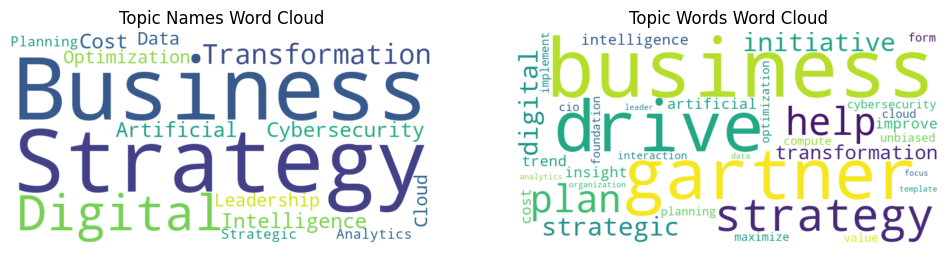

In [56]:
# Create a WordCloud for topic names
topic_names_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_topics['topic_name']))

# Create a WordCloud for topic words
topic_words_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_topics['topic_words']))

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(topic_names_wordcloud, interpolation='bilinear')
plt.title('Topic Names Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(topic_words_wordcloud, interpolation='bilinear')
plt.title('Topic Words Word Cloud')
plt.axis("off")

plt.show()